# Importing Required Packages

In [60]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud
import plotly.graph_objects as go
import missingno as msno

import warnings
warnings.filterwarnings('ignore')

# Data Ingestion

In [48]:
data = pd.read_csv("Youtube_dataset_all_dataScience_channels.csv")

# Data Understanding

In [49]:
data.head()

Channel_Name                                              Title  \
0  DeepLearningAI  Learn to build multi-agent systems with divers...   
1  DeepLearningAI                 New Course: AI Agents in LangGraph   
2  DeepLearningAI  New course on agents! Enroll in AI Agentic Des...   
3  DeepLearningAI  Learn to deploy AI models on edge devices like...   
4  DeepLearningAI  New course with Qualcomm: Introduction to On-D...   

  Published_date   Views  Like_count  Comment_Count  
0     2024-06-06  1650.0      1650.0            2.0  
1     2024-06-05  2472.0      2472.0            1.0  
2     2024-05-29  3140.0      3140.0            5.0  
3     2024-05-28  2234.0      2234.0            0.0  
4     2024-05-21  2987.0      2987.0            6.0

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22958 entries, 0 to 22957
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Channel_Name    22958 non-null  object 
 1   Title           22958 non-null  object 
 2   Published_date  22958 non-null  object 
 3   Views           22956 non-null  float64
 4   Like_count      22956 non-null  float64
 5   Comment_Count   22931 non-null  float64
dtypes: float64(3), object(3)
memory usage: 1.1+ MB


In [51]:
data.shape

(22958, 6)

In [52]:
data.columns

Index(['Channel_Name', 'Title', 'Published_date', 'Views', 'Like_count',
       'Comment_Count'],
      dtype='object')

# Checking Null Values

In [53]:
print(data.isnull().sum())

Channel_Name       0
Title              0
Published_date     0
Views              2
Like_count         2
Comment_Count     27
dtype: int64


In [56]:
print("Imputing the null values started")
data.fillna(0, inplace=True)
print("Imputing the null values completed")

Imputing the null values started
Imputing the null values completed


In [58]:
print("After imputing the null values, verifying the null values")
print(data.isnull().sum())

After imputing the null values, verifying the null values
Channel_Name      0
Title             0
Published_date    0
Views             0
Like_count        0
Comment_Count     0
dtype: int64


<Figure size 1000x400 with 0 Axes>

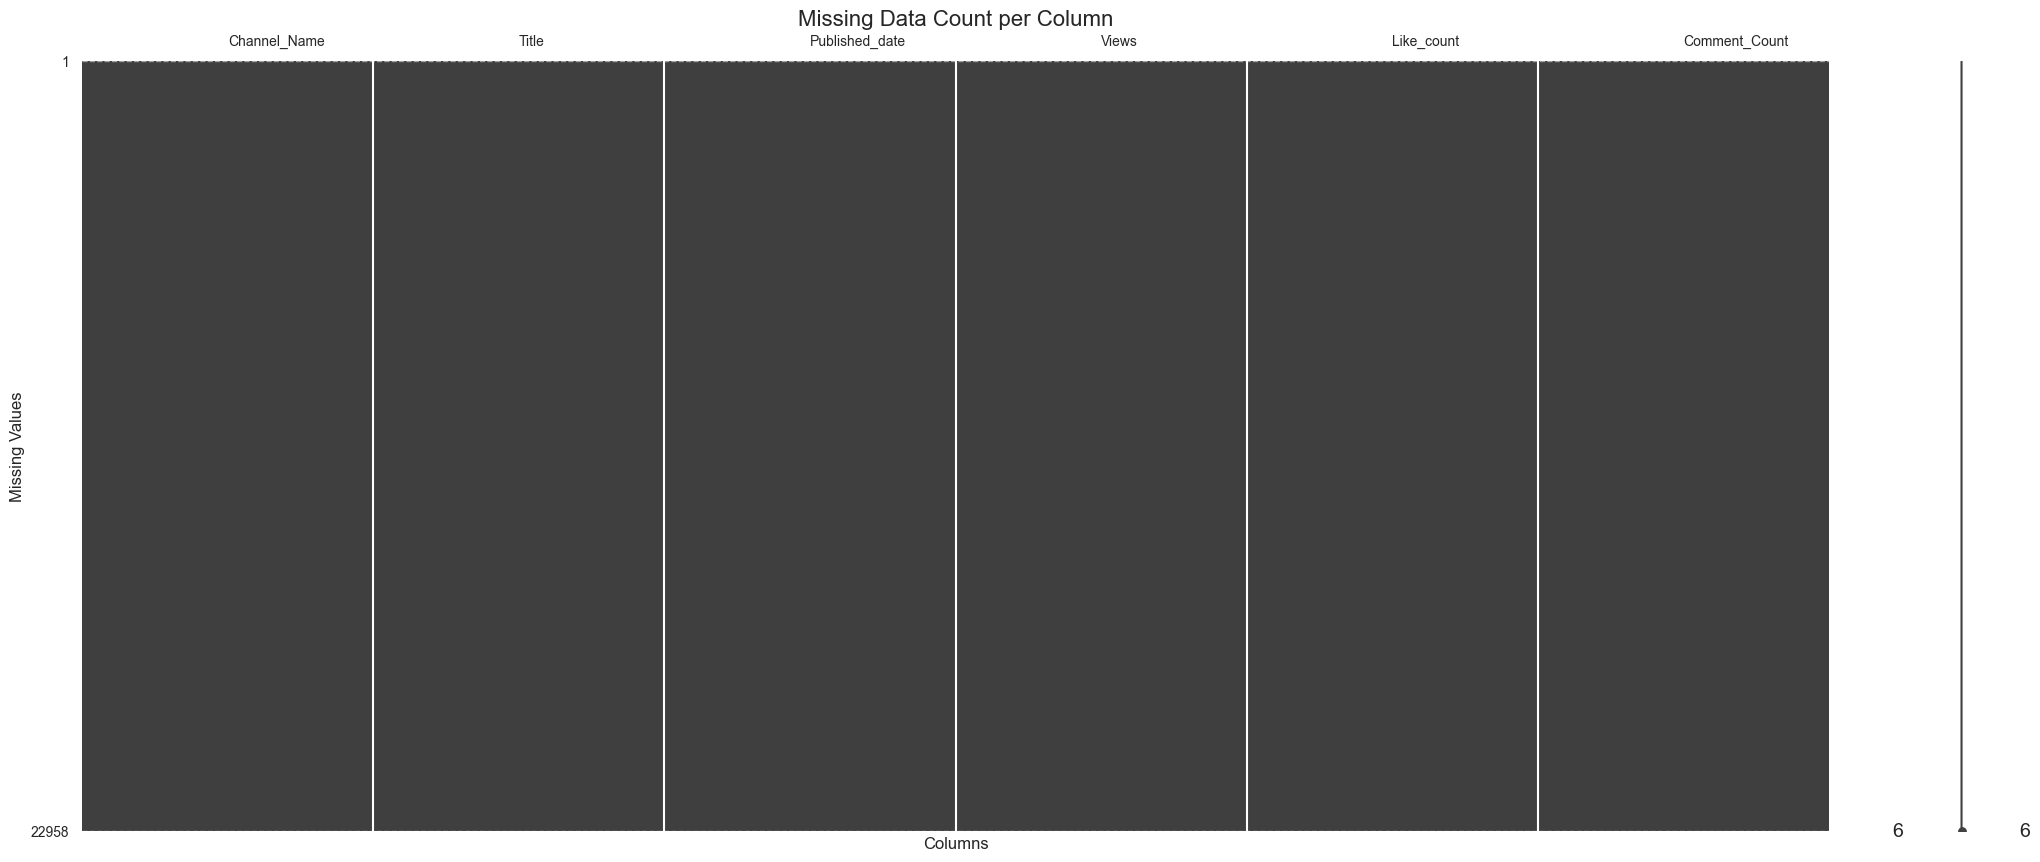

In [76]:
plt.figure(figsize=(10, 4))
msno.matrix(data)
plt.title('Missing Data Count per Column', fontsize=16)
plt.xlabel('Columns', fontsize=12)
plt.ylabel('Missing Values', fontsize=12)
plt.xticks(rotation=0, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Checking the Duplicated Rows Count

In [9]:
data.duplicated().sum()

0

# Data Visualisations

## Count of Videos in each Channel

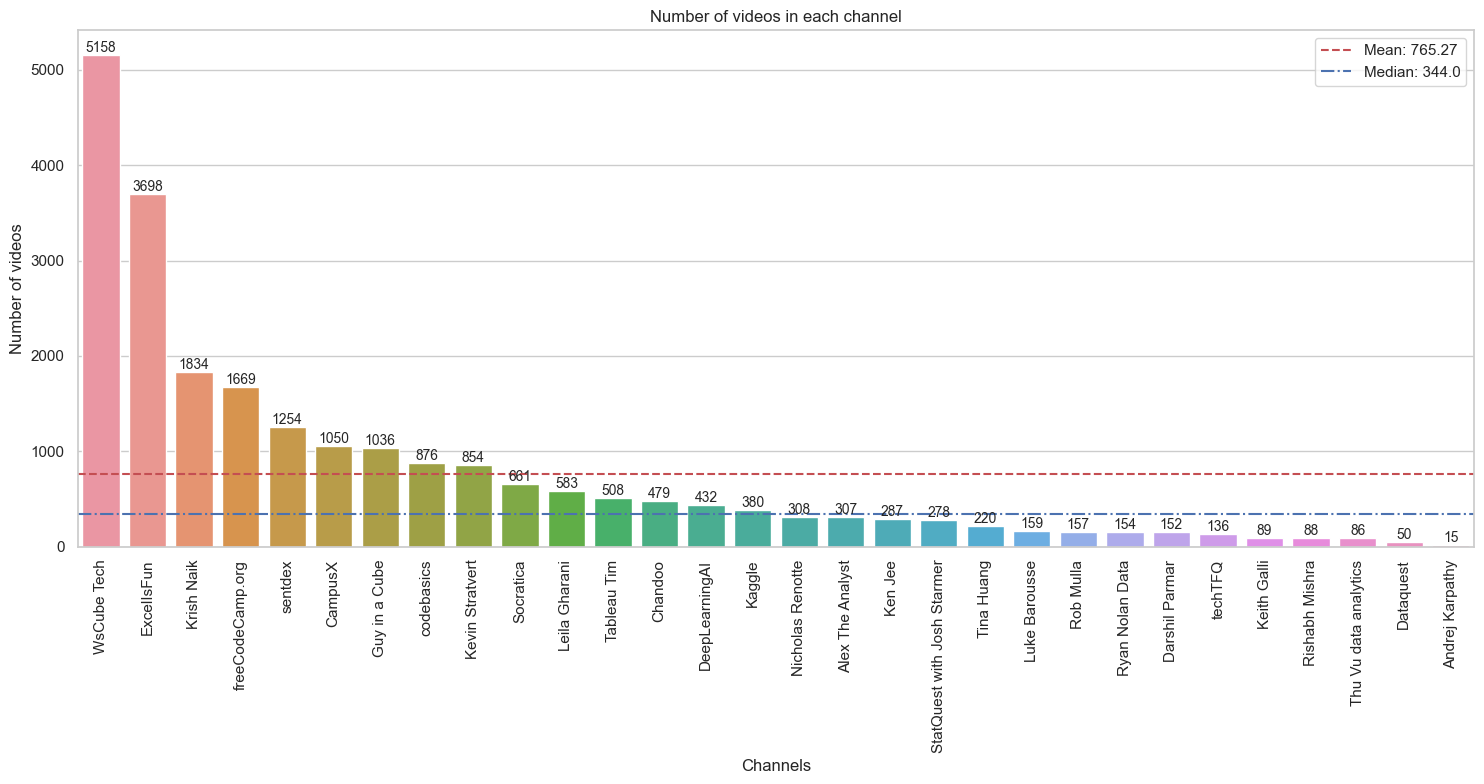

In [77]:
channel_counts = data['Channel_Name'].value_counts()
mean_videos = channel_counts.mean()
median_videos = channel_counts.median()

plt.figure(figsize=(15, 8))
ax = sns.countplot(x=data["Channel_Name"], order=channel_counts.index)
plt.axhline(y=mean_videos, color='r', linestyle='--', label=f'Mean: {mean_videos:.2f}')
plt.axhline(y=median_videos, color='b', linestyle='-.', label=f'Median: {median_videos}')
plt.xticks(rotation=90)
plt.title("Number of videos in each channel")
plt.ylabel("Number of videos")
plt.xlabel("Channels")

for rect in ax.patches:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height, f'{int(height)}', ha='center', va='bottom', fontsize=10)

plt.legend()
plt.tight_layout()
plt.show()


# Statistical Measures

In [79]:
data['Channel_Name'].describe()

count           22958
unique             30
top       WsCube Tech
freq             5158
Name: Channel_Name, dtype: object

In [80]:
data[['Views', 'Like_count', 'Comment_Count']].describe().round(2)

Views   Like_count  Comment_Count
count     22958.00     22958.00       22958.00
mean     113146.31    113146.31         102.26
std      538898.69    538898.69         430.82
min           0.00         0.00           0.00
25%        6417.50      6417.50           8.00
50%       19034.00     19034.00          25.00
75%       65198.25     65198.25          77.00
max    44191019.00  44191019.00       44314.00

In [81]:
data[['Views', 'Like_count', 'Comment_Count']].agg(['min', 'max']).round(2)

Views  Like_count  Comment_Count
min         0.0         0.0            0.0
max  44191019.0  44191019.0        44314.0

In [82]:
data['Published_date'].describe()

count          22958
unique          4324
top       2017-08-25
freq             111
Name: Published_date, dtype: object

In [83]:
data['Published_date'].agg(['min', 'max'])

min    2008-02-29
max    2024-06-12
Name: Published_date, dtype: object

In [22]:
data['Like_count'].groupby(data['Channel_Name']).max().head(10)

Channel_Name
Alex The Analyst    1857612.0
Andrej Karpathy     4395131.0
CampusX              921921.0
Chandoo             2660144.0
Darshil Parmar       535465.0
Dataquest            631510.0
DeepLearningAI       609793.0
ExcelIsFun          5418272.0
Guy in a Cube        845109.0
Kaggle               592317.0
Name: Like_count, dtype: float64

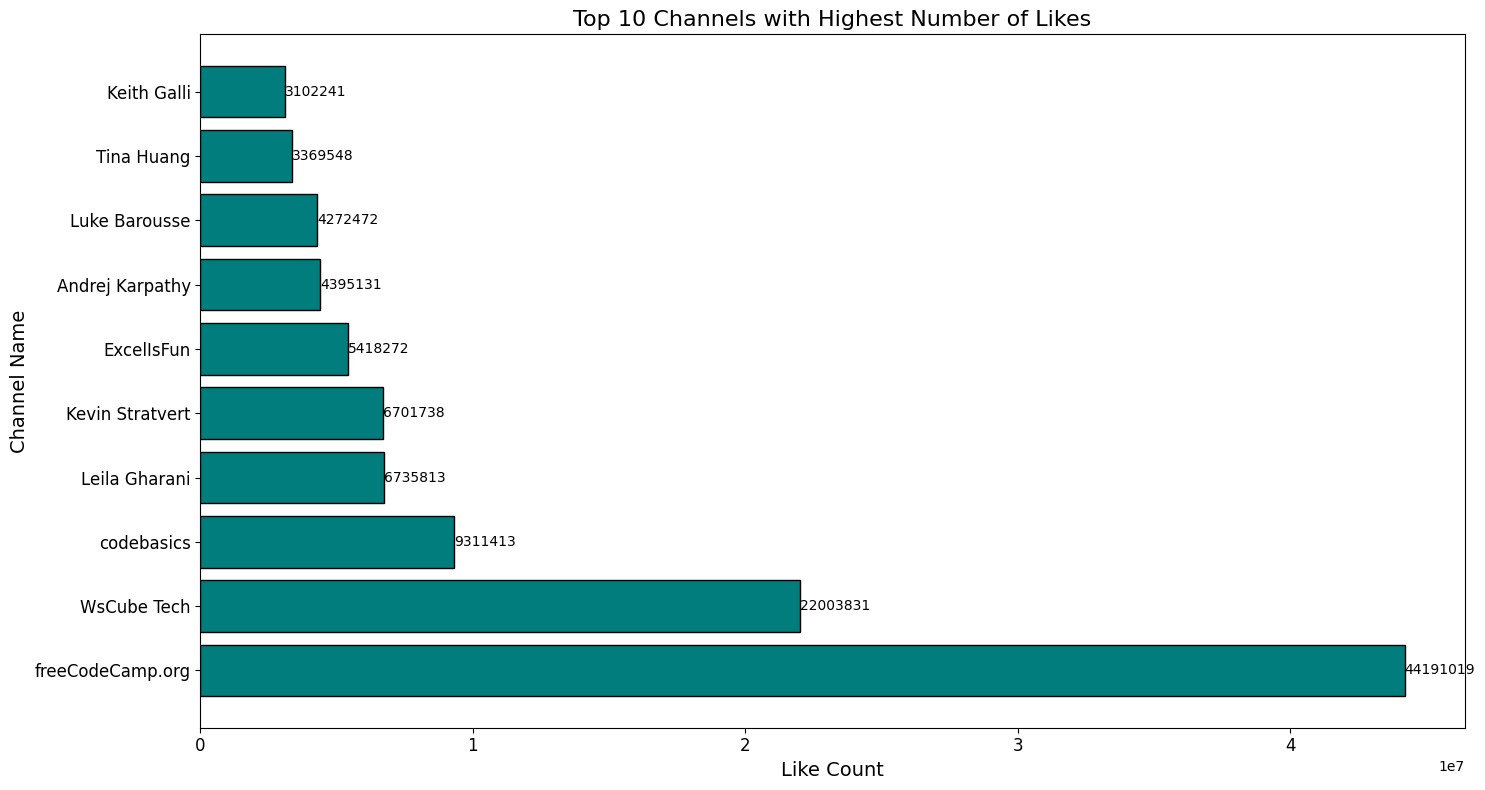

In [29]:
top_channels = data.groupby('Channel_Name')['Like_count'].max().nlargest(10).reset_index()

fig, ax = plt.subplots(figsize=(15, 8))
ax.barh(top_channels['Channel_Name'], top_channels['Like_count'], color='#007d7c', edgecolor='black', linewidth=1)

ax.set_title('Top 10 Channels with Highest Number of Likes', fontsize=16)
ax.set_xlabel('Like Count', fontsize=14)
ax.set_ylabel('Channel Name', fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=12)
plt.xticks(rotation=0)

for i, v in enumerate(top_channels['Like_count']):
    ax.text(v, i, str(int(v)), va='center', ha='left', fontsize=10)

plt.tight_layout()
plt.show()

In [30]:
data['Views'].groupby(data['Channel_Name']).max().head(10)

Channel_Name
Alex The Analyst    1857612.0
Andrej Karpathy     4395131.0
CampusX              921921.0
Chandoo             2660144.0
Darshil Parmar       535465.0
Dataquest            631510.0
DeepLearningAI       609793.0
ExcelIsFun          5418272.0
Guy in a Cube        845109.0
Kaggle               592317.0
Name: Views, dtype: float64

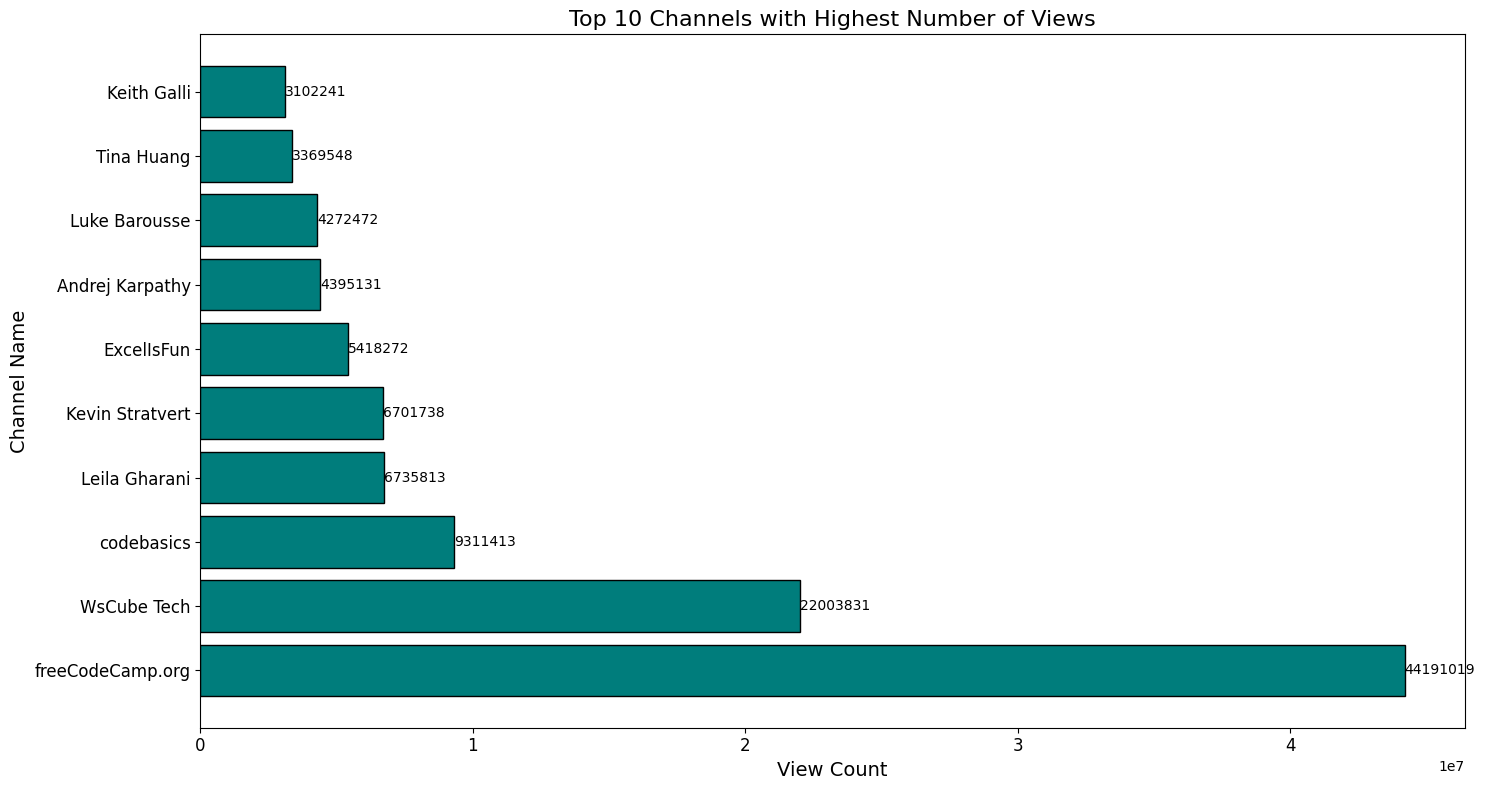

In [32]:
# Get the top 10 channels by view count
top_channels = data.groupby('Channel_Name')['Views'].max().nlargest(10).reset_index()

# Create the plot
fig, ax = plt.subplots(figsize=(15, 8))
ax.barh(top_channels['Channel_Name'], top_channels['Views'], color='#007d7c', edgecolor='black', linewidth=1)

# Add labels and title
ax.set_title('Top 10 Channels with Highest Number of Views', fontsize=16)
ax.set_xlabel('View Count', fontsize=14)
ax.set_ylabel('Channel Name', fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=12)

# Rotate the x-axis labels
plt.xticks(rotation=0)

# Add data labels to the bars
for i, v in enumerate(top_channels['Views']):
    ax.text(v, i, str(int(v)), va='center', ha='left', fontsize=10)

# Adjust the spacing
plt.tight_layout()

# Display the plot
plt.show()

In [33]:
data['Comment_Count'].groupby(data['Channel_Name']).max().head(10)

Channel_Name
Alex The Analyst    4055.0
Andrej Karpathy     2414.0
CampusX             1386.0
Chandoo             1529.0
Darshil Parmar       670.0
Dataquest            436.0
DeepLearningAI       365.0
ExcelIsFun          1791.0
Guy in a Cube        724.0
Kaggle               489.0
Name: Comment_Count, dtype: float64

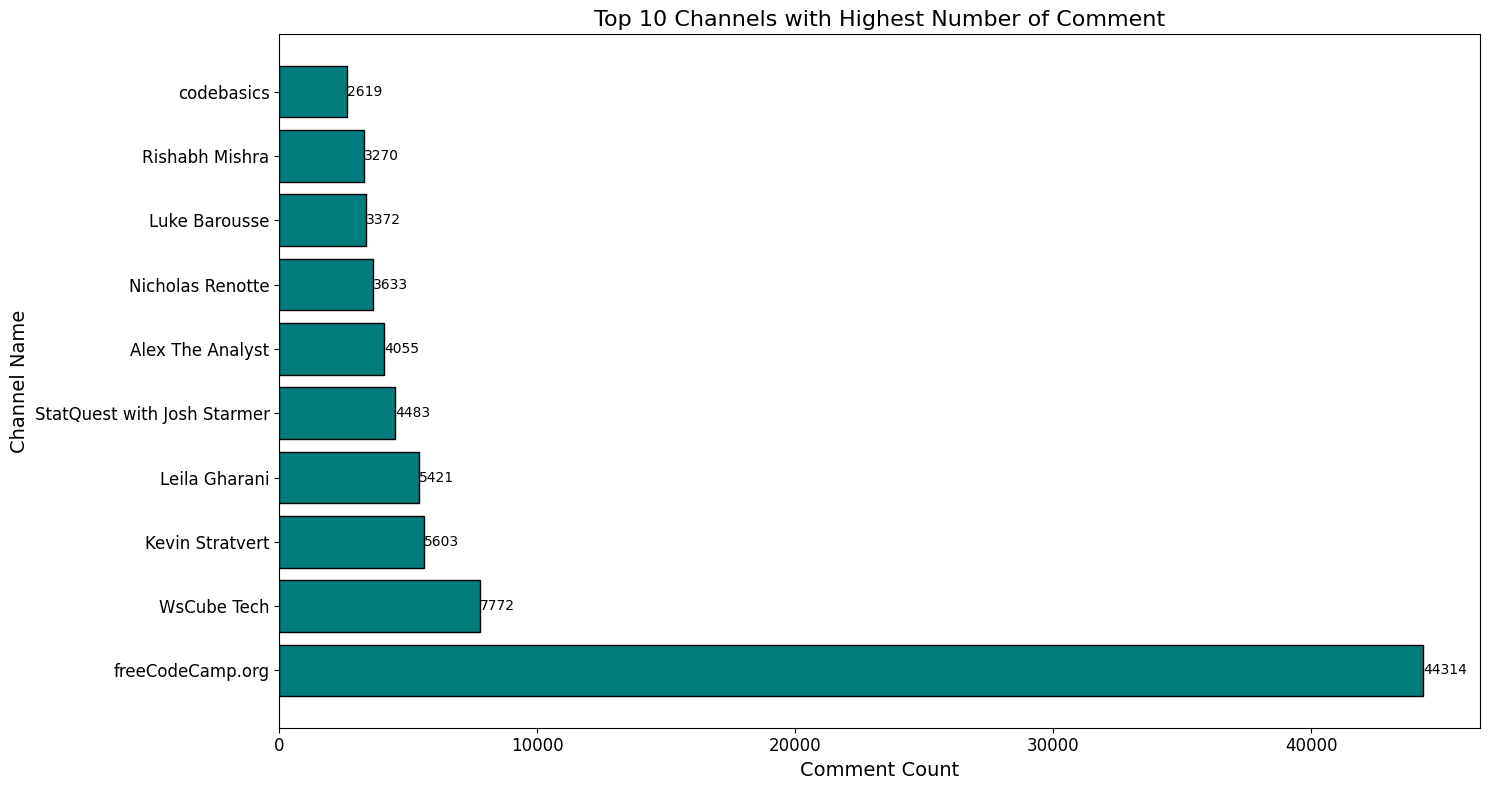

In [35]:
# Get the top 10 channels by comment count
top_channels = data.groupby('Channel_Name')['Comment_Count'].max().nlargest(10).reset_index()

# Create the plot
fig, ax = plt.subplots(figsize=(15, 8))
ax.barh(top_channels['Channel_Name'], top_channels['Comment_Count'], color='#007d7c', edgecolor='black', linewidth=1)

# Add labels and title
ax.set_title('Top 10 Channels with Highest Number of Comment', fontsize=16)
ax.set_xlabel('Comment Count', fontsize=14)
ax.set_ylabel('Channel Name', fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=12)

# Rotate the x-axis labels
plt.xticks(rotation=0)

# Add data labels to the bars
for i, v in enumerate(top_channels['Comment_Count']):
    ax.text(v, i, str(int(v)), va='center', ha='left', fontsize=10)

# Adjust the spacing
plt.tight_layout()

# Display the plot
plt.show()

In [36]:
# how many videos have more than 10,000,000 (ten million) likes
print(data['Channel_Name'][data['Like_count'] > 10000000].count())
# print title of videos with more than 10,000,000 (ten million) likes
print("__________title of videos with more than 10,000,000 (ten million) likes_________")
data['Title'][data['Like_count'] > 10000000]

7
__________title of videos with more than 10,000,000 (ten million) likes_________


11210    Ethical HACKING Full Course in 10 HOURS (Begin...
20124    Harvard CS50 – Full Computer Science Universit...
20720         Learn JavaScript - Full Course for Beginners
20860             C++ Tutorial for Beginners - Full Course
20872                 C Programming Tutorial for Beginners
20913    Learn Python - Full Course for Beginners [Tuto...
20930    SQL Tutorial - Full Database Course for Beginners
Name: Title, dtype: object

In [37]:
# how many videos have more than 10,000,000 (ten million) views
print(data['Channel_Name'][data['Views'] > 10000000].count())
# print title of videos with more than 10,000,000 (ten million) views
print("__________title of videos with more than 10,000,000 (ten million) views_________")
data['Title'][data['Views'] > 10000000]

7
__________title of videos with more than 10,000,000 (ten million) views_________


11210    Ethical HACKING Full Course in 10 HOURS (Begin...
20124    Harvard CS50 – Full Computer Science Universit...
20720         Learn JavaScript - Full Course for Beginners
20860             C++ Tutorial for Beginners - Full Course
20872                 C Programming Tutorial for Beginners
20913    Learn Python - Full Course for Beginners [Tuto...
20930    SQL Tutorial - Full Database Course for Beginners
Name: Title, dtype: object

In [38]:
# how many videos have more than 10,000  comments
print(data['Channel_Name'][data['Comment_Count'] > 10000].count())
# print title of videos with more than 10,000 comments
print("__________title of videos with more than 10,000 comments_________")
data['Title'][data['Comment_Count'] > 10000]

3
__________title of videos with more than 10,000 comments_________


20860             C++ Tutorial for Beginners - Full Course
20913    Learn Python - Full Course for Beginners [Tuto...
20930    SQL Tutorial - Full Database Course for Beginners
Name: Title, dtype: object

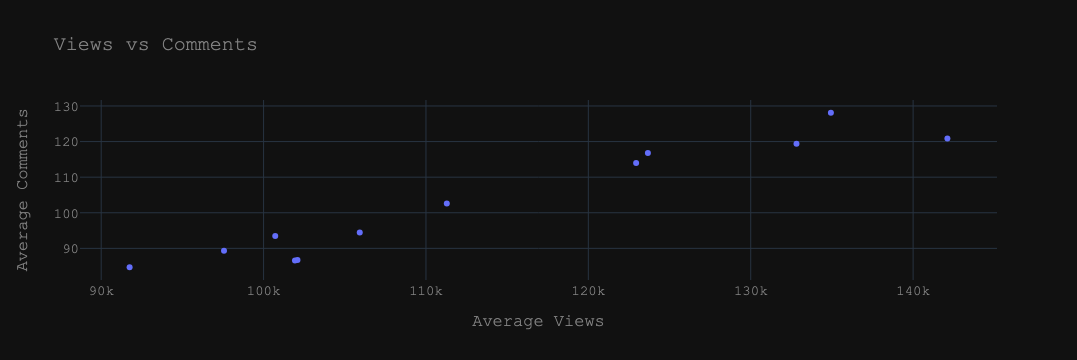

In [39]:
data['Published_date'] = pd.to_datetime(data['Published_date'])

# Extract year and month from the 'Published_date'
data['year'] = data['Published_date'].dt.year
data['month'] = data['Published_date'].dt.month

# Group by month and calculate the average views and comments
monthly_avg = data.groupby('month')[['Views', 'Comment_Count']].mean().reset_index()

# Create the scatter plot
fig = px.scatter(monthly_avg, x='Views', y='Comment_Count',
                 title='Views vs Comments',
                 labels={'Views': 'Average Views', 'Comment_Count': 'Average Comments'},
                 template='plotly_dark')

# Customize the layout
fig.update_layout(
    xaxis_title="Average Views",
    yaxis_title="Average Comments",
    font=dict(
        family="Courier New, monospace",
        size=14,
        color="#7f7f7f"
    )
)

fig.show()

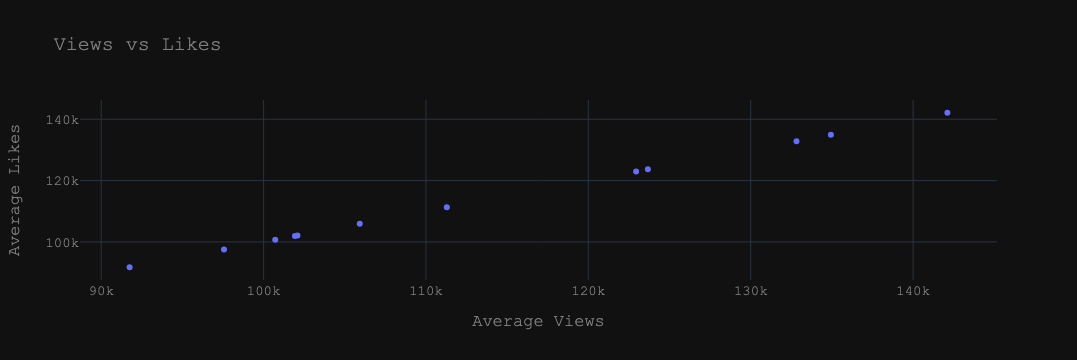

In [40]:
# Group by month and calculate the average likes and views
monthly_avg = data.groupby('month')[['Like_count', 'Views']].mean().reset_index()

# Create the scatter plot
fig = px.scatter(monthly_avg, x='Views', y='Like_count',
                 title=' Views vs Likes',
                 labels={'Views': 'Average Views', 'Like_count': 'Average Likes'},
                 template='plotly_dark')

# Customize the layout
fig.update_layout(
    xaxis_title="Average Views",
    yaxis_title="Average Likes",
    font=dict(
        family="Courier New, monospace",
        size=14,
        color="#7f7f7f"
    )
)

fig.show()

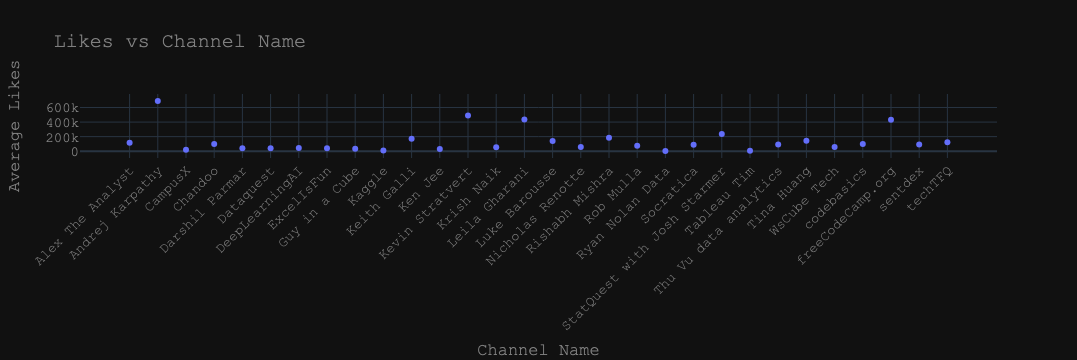

In [41]:
# Group by Channel_Name and calculate the average likes
channel_likes = data.groupby('Channel_Name')['Like_count'].mean().reset_index()

# Create the scatter plot
fig = px.scatter(channel_likes, x='Channel_Name', y='Like_count',
                 title=' Likes vs Channel Name',
                 labels={'Channel_Name': 'Channel Name', 'Like_count': 'Average Likes'},
                 template='plotly_dark')

# Customize the layout
fig.update_layout(
    xaxis_title="Channel Name",
    yaxis_title="Average Likes",
    font=dict(
        family="Courier New, monospace",
        size=14,
        color="#7f7f7f"
    ),
    xaxis_tickangle=-45
)

fig.show()

In [42]:
data['publish_date'] = pd.to_datetime(data['Published_date'])

# Extract year and month from the publish date
data['year'] = data['publish_date'].dt.year
data['month'] = data['publish_date'].dt.month

# Group by year and calculate the sum of views, likes, and comments
yearly_data = data.groupby('year')[['Views', 'Like_count', 'Comment_Count']].sum().reset_index()

print("Yearly Data:")
print(yearly_data)


Yearly Data:
    year        Views   Like_count  Comment_Count
0   2008   22022134.0   22022134.0         8460.0
1   2009   27035684.0   27035684.0         9698.0
2   2010   22467572.0   22467572.0         8341.0
3   2011   16278454.0   16278454.0         6763.0
4   2012   18713059.0   18713059.0         9956.0
5   2013   26628638.0   26628638.0        17936.0
6   2014   41098125.0   41098125.0        30513.0
7   2015   39824091.0   39824091.0        31151.0
8   2016   52527550.0   52527550.0        50837.0
9   2017  110918957.0  110918957.0        99900.0
10  2018  252950947.0  252950947.0       234888.0
11  2019  357491113.0  357491113.0       302669.0
12  2020  421882608.0  421882608.0       416579.0
13  2021  500637257.0  500637257.0       452978.0
14  2022  405691985.0  405691985.0       365639.0
15  2023  230701146.0  230701146.0       231461.0
16  2024   50743709.0   50743709.0        69965.0


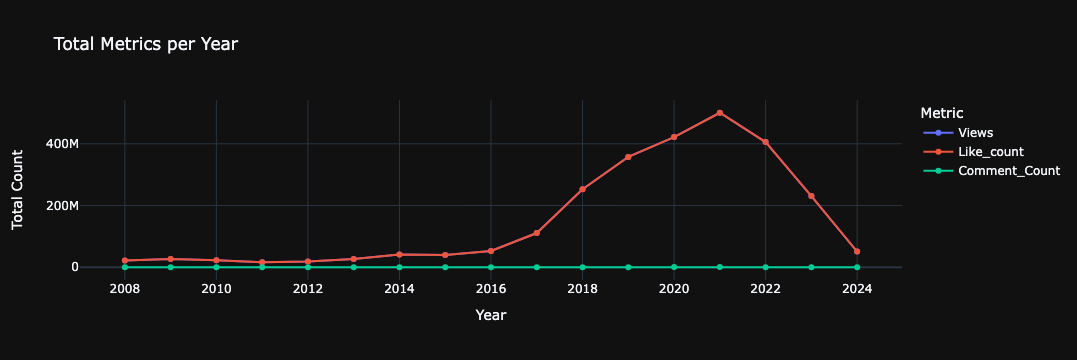

In [43]:
data['publish_date'] = pd.to_datetime(data['Published_date'])

# Extract year and month from the publish date
data['year'] = data['publish_date'].dt.year

# Group by year and calculate the sum of views, likes, and comments
yearly_data = data.groupby('year')[['Views', 'Like_count', 'Comment_Count']].sum().reset_index()

# Visualization of yearly trend with plotly
fig = px.line(yearly_data, x='year', y=['Views', 'Like_count', 'Comment_Count'],
              title='Total Metrics per Year',
              labels={'year': 'Year', 'value': 'Total Count', 'variable': 'Metric'},
              template='plotly_dark')

fig.update_traces(mode='lines+markers')  # Add markers to lines for better visibility
fig.show()

Monthly Averages:
    month          Views     Like_count  Comment_Count
0       1  111284.891293  111284.891293     102.631662
1       2   97563.618537   97563.618537      89.324878
2       3  105922.719929  105922.719929      94.462494
3       4  123667.582286  123667.582286     116.821714
4       5  100718.536932  100718.536932      93.504735
5       6  102087.486895  102087.486895      86.745968
6       7  134936.889236  134936.889236     128.099324
7       8  142111.468801  142111.468801     120.844276
8       9  132817.819256  132817.819256     119.398701
9      10  101932.811000  101932.811000      86.582000
10     11   91749.479467   91749.479467      84.696533
11     12  122942.988608  122942.988608     114.000000


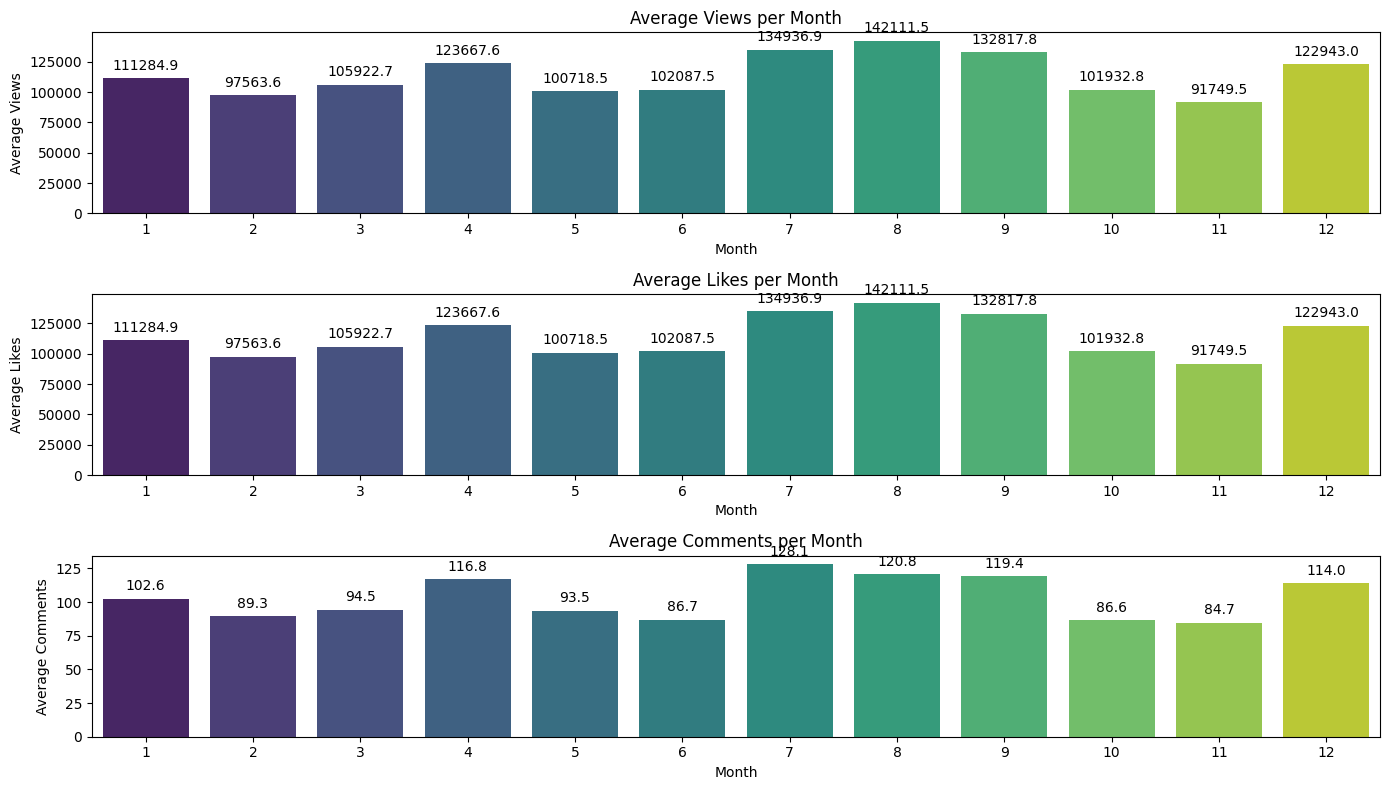

In [44]:
# Group by month and calculate the average views, likes, and comments
monthly_avg = data.groupby('month')[['Views', 'Like_count', 'Comment_Count']].mean().reset_index()

print("Monthly Averages:")
print(monthly_avg)

# Visualization of monthly averages
plt.figure(figsize=(14, 8))

# Views
plt.subplot(3, 1, 1)
ax1 = sns.barplot(x='month', y='Views', data=monthly_avg, palette='viridis')
plt.title('Average Views per Month')
plt.xlabel('Month')
plt.ylabel('Average Views')
for p in ax1.patches:
    ax1.annotate(format(p.get_height(), '.1f'), 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha = 'center', va = 'center', 
                 xytext = (0, 9), 
                 textcoords = 'offset points')

# Likes
plt.subplot(3, 1, 2)
ax2 = sns.barplot(x='month', y='Like_count', data=monthly_avg, palette='viridis')
plt.title('Average Likes per Month')
plt.xlabel('Month')
plt.ylabel('Average Likes')
for p in ax2.patches:
    ax2.annotate(format(p.get_height(), '.1f'), 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha = 'center', va = 'center', 
                 xytext = (0, 9), 
                 textcoords = 'offset points')

# Comments
plt.subplot(3, 1, 3)
ax3 = sns.barplot(x='month', y='Comment_Count', data=monthly_avg, palette='viridis')
plt.title('Average Comments per Month')
plt.xlabel('Month')
plt.ylabel('Average Comments')
for p in ax3.patches:
    ax3.annotate(format(p.get_height(), '.1f'), 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha = 'center', va = 'center', 
                 xytext = (0, 9), 
                 textcoords = 'offset points')

plt.tight_layout()
plt.show()


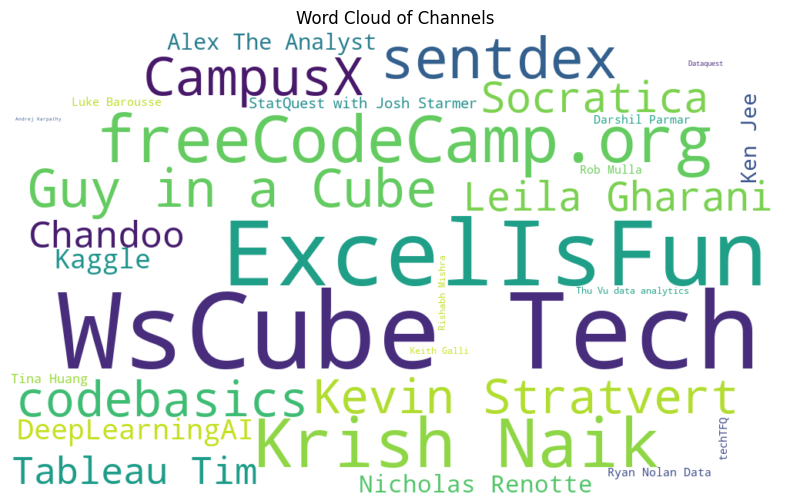

In [45]:
# Create word cloud
wordcloud = WordCloud(width=1000, height=600, background_color='white', colormap='viridis').generate_from_frequencies(data['Channel_Name'].value_counts())
# Plot word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Channels')
plt.axis('off')
plt.show()